> Execrcise for matplotlib cookbook

# First Steps

## Plotting curives from file data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_value = np.arange(1,10)
y_value = x_value**2
z_value = x_value**3
with open('./test_data.txt','w') as f:
    for x, y, z in zip(x_value,y_value,z_value):
        f.write('{:<10,d}{:<10,d}{:<10,d}\n'.format(x,y,z))

In [3]:
with open('./test_data.txt','r') as f:
    data = f.read()
print(data)

1         1         1         
2         4         8         
3         9         27        
4         16        64        
5         25        125       
6         36        216       
7         49        343       
8         64        512       
9         81        729       



[[  1.   2.   3.   4.   5.   6.   7.   8.   9.]
 [  1.   4.   9.  16.  25.  36.  49.  64.  81.]
 [  1.   8.  27.  64. 125. 216. 343. 512. 729.]]


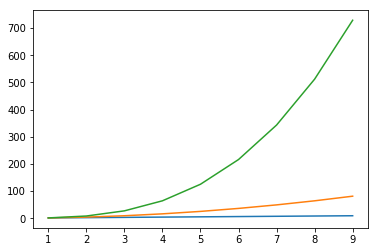

In [4]:
# X, Y = [], []
# for line in open('./test_data.txt','r'):
#     values = [float(s) for s in line.split()]
#     X.append(values[0])
#     Y.append(values[1])

# with open('./test_data.txt','r') as f:
#     s = [[float(s) for s in line.split()] for line in f]
#     X, Y = zip(*s)
# print('S type:{}\n s={}'.format(type(s),s))
# print(type(X),len(Y),X,Y)


data = plt.np.loadtxt('./test_data.txt')
print(data.T)

for column in data.T: #for 循环 按照文件的row 来读
    plt.plot(data[:,0],column)
plt.show()

## Plotting points

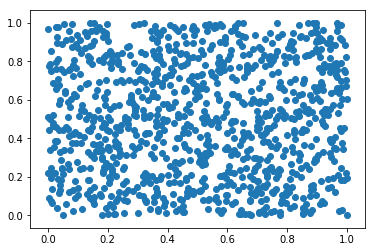

In [6]:
data2 = np.random.rand(1024,2)

plt.scatter(data2[:,0],data2[:,1])
plt.show()

## Bar chart

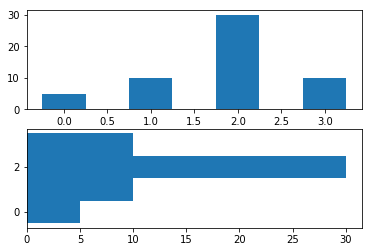

In [15]:
data2_1 = [5,10,30,10]

ax1 = plt.subplot(211)
plt.bar(range(len(data2_1)),data2_1,width=0.5)

ax2 = plt.subplot(212)
plt.barh(range(len(data2_1)),data2_1,height = 1)
plt.show()

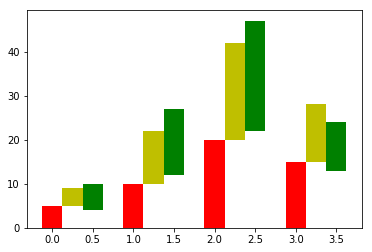

In [27]:
data2_2 = [[5,10,20,15],
          [4,12,22,13],
          [6,15,25,11]]

X = np.arange(len(data2_2[0]))

plt.bar(X,data2_2[0],color = 'r',align = 'center',width=0.25)
plt.bar(X + 0.25,data2_2[1],color = 'y',width=0.25,bottom = data2_2[0])
plt.bar(X + 0.50,data2_2[2],color = 'g',align = 'center',width=-0.25,bottom=data2_2[1])

plt.show()

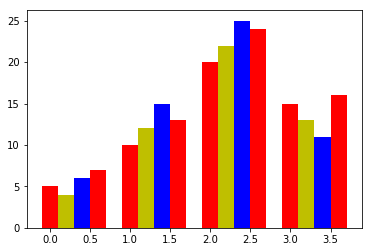

In [25]:
# More beautiful version
data2_2 = [[5,10,20,15],
          [4,12,22,13],
          [6,15,25,11],
          [7,13,24,16]]

color_list = ['r','y','b']

gap = .8/ len(data2_2)

for i,row in enumerate(data2_2):
    X= np.arange(len(row))
    plt.bar(X + i * gap, row,
            width = gap,
           color = color_list[i % len(color_list)]) # 循环使用颜色
plt.show()  

## Histgrams

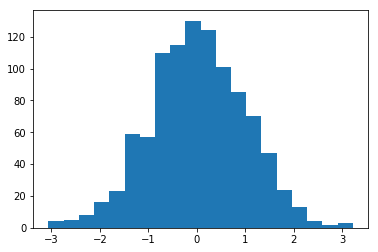

In [30]:
X4 = np.random.randn(1000)

plt.hist(X4,bins = 20)
plt.show()

## Boxplot

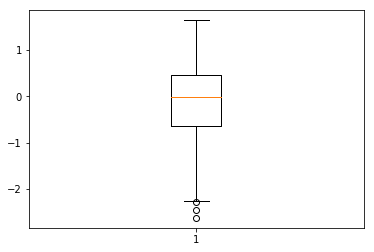

In [32]:
data5 = np.random.randn(100)

plt.boxplot(data5)
plt.show()

## Triangulations

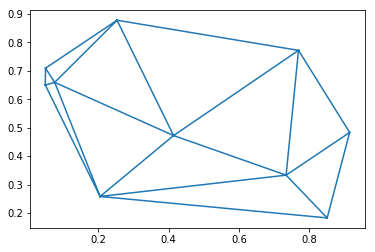

In [36]:
import matplotlib.tri as tri

data6 = np.random.rand(10,2)

triangles = tri.Triangulation(data6[:,0],data6[:,1])
plt.triplot(triangles)
plt.show()

In [37]:
triangles

# Customizing the Color and Styles

- color = / edgecolor = 
- triplets : RBG [0,1]
- quadruplets: the forth value is transparency
- predefined names red/bule/green
- HTML color string #RRGGBB
- Gray-level strings: a string representation of a floating point


## Defining your own colors

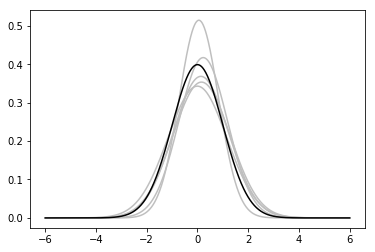

In [2]:
def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)
X = np.linspace(-6, 6, 1000)
for i in range(5):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X, pdf(X, mu, sigma), color = '.75')
plt.plot(X, pdf(X, 0., 1.), color = 'k')
plt.show()

## Using custom colors for scatter plots

- Common color for all the dots
- Individual color for each dot:

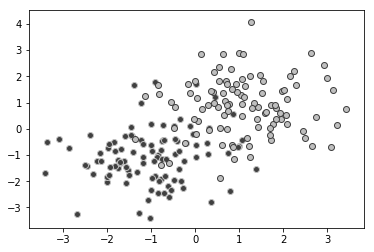

In [7]:
A = np.random.standard_normal((100,2))
A += np.array((-1,-1))

B = np.random.standard_normal((100,2))
B += np.array((1,1))

plt.scatter(A[:,0], A[:,1],color='0.25',edgecolors='0.75')
plt.scatter(B[:,0], B[:,1],color='0.75',edgecolors='0.25')
plt.show()

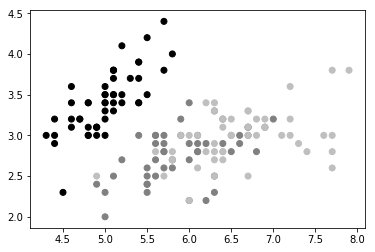

In [20]:
label_set =(
    b'Iris-setosa',
    b'Iris-versicolor',
    b'Iris-virginica'
)

def label2index(label):
    return label_set.index(label)

data = np.loadtxt('iris.data.txt',
                   delimiter=',',
                   converters={4 :label2index})

color_set = ('.00','.50','.75')
color_list = [color_set[int(label)] for label in data[:,4]]

plt.scatter(data[:,0],data[:,1],color = color_list)
plt.show()

## Using custom colors for bar charts

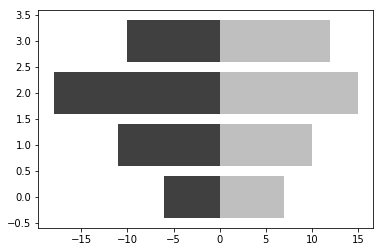

In [11]:
men_pop = np.array([7.,10,15,12])
women_pop = np.array([6,11,18,10])

X = np.arange(4)
plt.barh(X,men_pop,color = '0.75')
plt.barh(X,-women_pop,color='0.25')
plt.show()

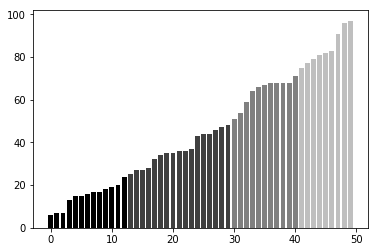

In [18]:
values = np.random.randint(100,size = 50)
values.sort()

color_set = ('.00','.25','.50','.75')
color_list = [color_set[(val * len(color_set) // 100)] for val in values]

# plt.bar(np.arange(len(values)), values,color=color_list)
plt.bar(np.arange(len(values)), values,color=color_list)
plt.show()

## Using custom colors for pie charts
- colors not color

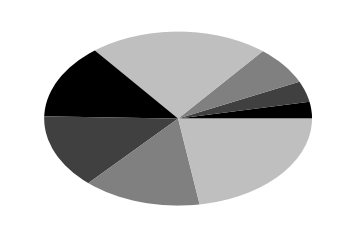

In [20]:
values = np.random.rand(8)

color_set = ['.00','.25','.50','.75']
plt.pie(values,colors=color_set)
plt.show()

## Using custom colors for boxplots

ValueError: too many values to unpack (expected 2)

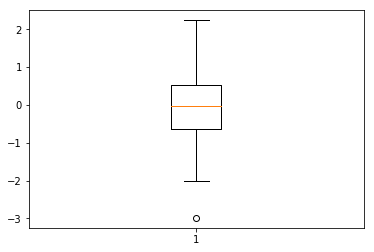

In [29]:
values = np.random.randn(100)

b = plt.boxplot(values)
for name,line_list in b.iteritems():
    for line in line_list:
        line.set_color('k')
plt.show()


## Using colormaps for scatter plots
- import matplotlib.cm as cm

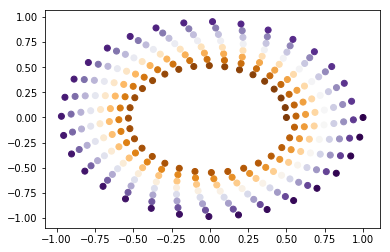

In [40]:
import matplotlib.cm as cm

N = 256

angle = np.linspace(0,8*2*np.pi,N)
radius = np.linspace(.5,1,N)

X = radius * np.cos(angle)
Y = radius * np.sin(angle)

plt.scatter(X,Y,c = angle, cmap = cm.PuOr)

# cmap = cm.ScalarMappable(col.Normalize(0,99),cmap=cm.PuOr)
# plt.plot(X,Y,color = cmap.to_rgba(radius))
plt.show()

## Using colormaps for bar charts

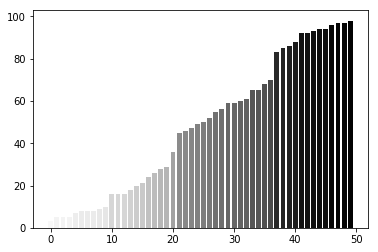

In [38]:
import matplotlib.colors as col

values = np.random.randint(100,size=50)
values.sort()

cmap = cm.ScalarMappable(col.Normalize(0,99), cm.binary)

plt.bar(np.arange(len(values)),values,color = cmap.to_rgba(values))
plt.show()

## Controlling a line pattern and thickness
- linestyle:
    - solid / dashed/ dashdot/ dotted
- linewidth

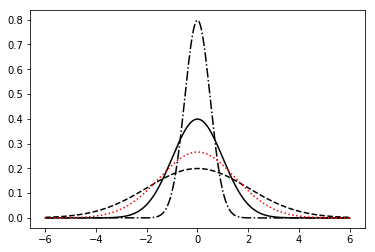

In [43]:
def pdf(X,mu,sigma):
    a = 1./(sigma * np.sqrt(2. * np.pi))
    b = -1. /(2 * sigma **2)
    return a* np.exp(b * (X-mu)**2)

X = np.linspace(-6,6,1024)

plt.plot(X,pdf(X,0,1), color = 'k', linestyle='solid')
plt.plot(X,pdf(X,0,2), color = 'k', linestyle='dashed')
plt.plot(X,pdf(X,0,.5), color= 'k', linestyle='dashdot')
plt.plot(X,pdf(X,0,1.5), color='r',linestyle='dotted')
plt.show()

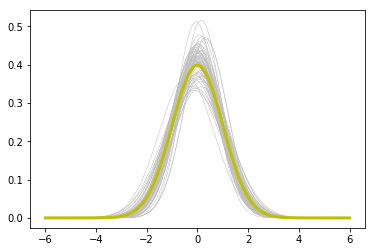

In [44]:
def pdf(X,mu,sigma):
    a = 1./(sigma * np.sqrt(2. * np.pi))
    b = -1. /(2 * sigma **2)
    return a* np.exp(b * (X-mu)**2)

X = np.linspace(-6,6,1024)
for i in range(64):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X,pdf(X,mu,sigma),color = '0.75',linewidth='0.5')

plt.plot(X,pdf(X,0.,1.),color = 'y',linewidth=3)
plt.show()

## Controlling a fill pattern
- hatch : 填充图样
- /,\,|,-,+,x,o,O,.,*

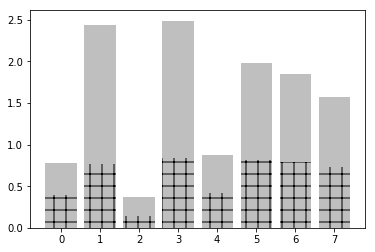

In [58]:
N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)

# plt.bar(X,A, color = 'w', hatch = 'x')
plt.bar(X,A, color = '.75',hatch = '+')
plt.bar(X,A+B, bottom = A, color = '0.75',linestyle = 'dashed')
plt.show()

## Controlling a marker's style
- https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

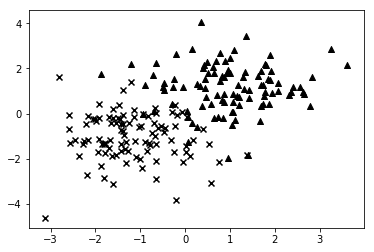

In [60]:
A = np.random.standard_normal((100,2))
A += np.array((-1,-1))

B = np.random.standard_normal((100,2))
B +=np.array((1,1))

plt.scatter(A[:,0],A[:,1],color = 'k',marker='x')
plt.scatter(B[:,0],B[:,1],color = 'k',marker='^')
plt.show()

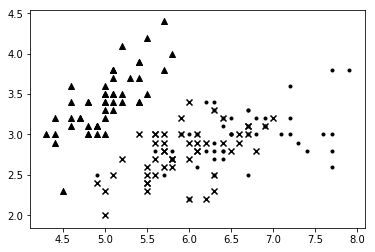

In [61]:
label_set =(
    b'Iris-setosa',
    b'Iris-versicolor',
    b'Iris-virginica'
)

def label2index(label):
    return label_set.index(label)

data = np.loadtxt('iris.data.txt',
                   delimiter=',',
                   converters={4 :label2index})

marker_set = ('^','x','.')
for i,marker in enumerate(marker_set):
    data_subset = np.asarray([x for x in data if x[4] == i])
    plt.scatter(data_subset[:,0],data_subset[:,1],
               color = 'k',
               marker = marker)
plt.show()
                              

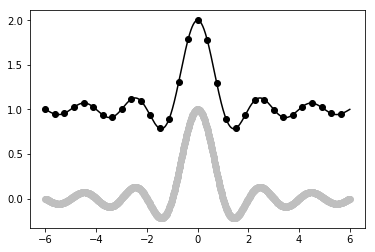

In [64]:
X = np.linspace(-6,6,1024)

Y1 = np.sinc(X)
Y2 = np.sinc(X) + 1

plt.plot(X,Y1,marker = 'o',color = '0.75')
plt.plot(X,Y2,marker = 'o', color = 'k', markevery = 32)
plt.show()

## Controlling a marker's size

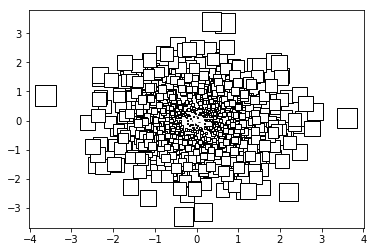

In [69]:
M = np.random.standard_normal((1000,2))
R = np.sum(M**2,axis = 1)

plt.scatter(M[:,0], M[:,1], color = 'w',marker = 's',s = 32. * R,edgecolors='k')
plt.show()

In [70]:
m1 = np.array([1,2])
m2 = m1 **2
print(m2)

[1 4]


## Creating your own markers

In [71]:
import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\dell-pc\\.matplotlib'

# Working with Annotations

## Adding a title
- plt.title("title string")

## Using LaTeX-style notations

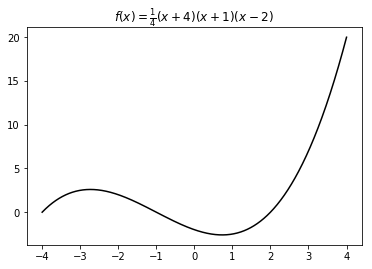

In [2]:
X = np.linspace(-4,4,1024)
Y = .25 * (X + 4.) * (X +1.) * (X-2.)

plt.title('$f(x) = \\frac{1}{4}(x+4)(x+1)(x-2)$')
plt.plot(X,Y,c='k')
plt.show()

## Adding a label to each axis

- plt.xlabel("xlabel string")
- plt.ylabel("ylabel string")

## Adding text

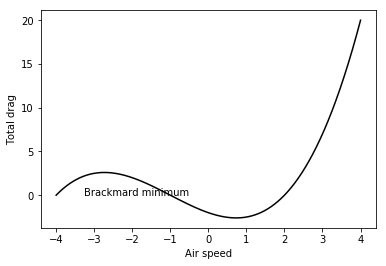

In [7]:
X = np.linspace(-4,4,1024)
Y = .25 * (X + 4.) * (X +1.) * (X-2.)

plt.text(-0.5,-0.25,'Brackmard minimum',va='bottom',ha='right')
plt.xlabel('Air speed')
plt.ylabel('Total drag')
plt.plot(X,Y,c='k')
plt.show()

## Adding arrows

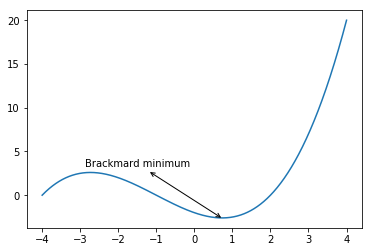

In [22]:
X = np.linspace(-4,4,1024)
Y = .25 * (X + 4.) * (X +1.) * (X-2.)

plt.annotate('Brackmard minimum',
            ha='center',
            va='bottom',
            xytext=(-1.5,3.),
            xy=(0.75,-2.7),
            arrowprops = {'facecolor':'black',
                          'arrowstyle':'<->'})
            
plt.plot(X,Y)
plt.show()

## Adding a legend

- plt.plot(,label='linename')
- plt.legend() before plt.show()

## Adding a grid

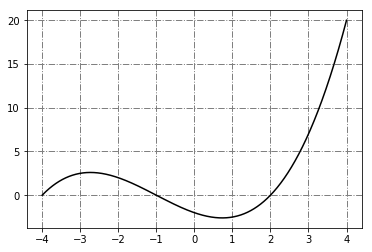

In [24]:
X = np.linspace(-4, 4, 1024)
Y = .25 * (X + 4.) * (X + 1.) * (X - 2.)

plt.plot(X, Y, c = 'k')
plt.grid(True,lw=1,ls = '-.',c='0.50')
plt.show()

## Adding lines

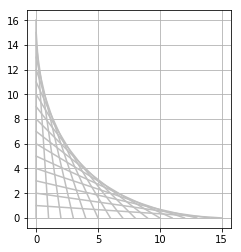

In [25]:
N = 16
for i in range(N):
    plt.gca().add_line(plt.Line2D((0, i), (N - i, 0), color = '.75'))
plt.grid(True)
plt.axis('scaled')
plt.show()

##  Adding shapes

In [26]:
import matplotlib.patches as patches

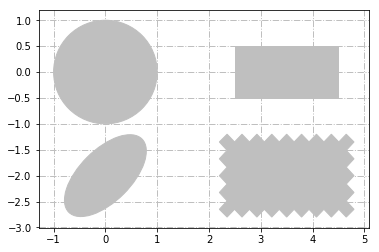

In [31]:
# Circle
shape = patches.Circle((0,0),radius =1, color = '.75')
plt.gca().add_patch(shape)

# Rectangle
shape = patches.Rectangle((2.5,-.5),2.,1. ,color = '.75')
plt.gca().add_patch(shape)

#Ellipse
shape = patches.Ellipse((0,-2.),2.,1.,angle = 45.,color = '0.75')
plt.gca().add_patch(shape)

# Fancy box
shape = patches.FancyBboxPatch((2.5,-2.5),2.,1.,boxstyle='sawtooth',color='.75')
plt.gca().add_patch(shape)

# Display all
plt.grid(True,lw='1',ls='-.',color='0.75')
plt.axis('scaled')
plt.show()

[[ 1.00000000e+00  6.23489802e-01 -2.22520934e-01 -9.00968868e-01
  -9.00968868e-01 -2.22520934e-01  6.23489802e-01  1.00000000e+00]
 [ 0.00000000e+00  7.81831482e-01  9.74927912e-01  4.33883739e-01
  -4.33883739e-01 -9.74927912e-01 -7.81831482e-01 -2.44929360e-16]]
[[ 1.00000000e+00  0.00000000e+00]
 [ 6.23489802e-01  7.81831482e-01]
 [-2.22520934e-01  9.74927912e-01]
 [-9.00968868e-01  4.33883739e-01]
 [-9.00968868e-01 -4.33883739e-01]
 [-2.22520934e-01 -9.74927912e-01]
 [ 6.23489802e-01 -7.81831482e-01]
 [ 1.00000000e+00 -2.44929360e-16]]


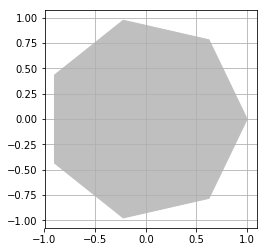

In [36]:
theta = np.linspace(0,2 * np.pi,8)
points = np.vstack((np.cos(theta),np.sin(theta))).transpose()
# print(np.vstack((np.cos(theta),np.sin(theta))))
# print(np.vstack((np.cos(theta),np.sin(theta))).transpose())

plt.gca().add_patch(patches.Polygon(points,color = '.75'))
plt.grid(True)
plt.axis('scaled')
plt.show()

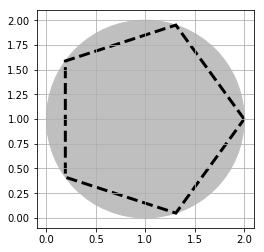

In [39]:
theta = np.linspace(0,2 * np.pi,6)
points = np.vstack((np.cos(theta),np.sin(theta))).transpose() + 1

plt.gca().add_patch(plt.Circle((1,1),radius =1,color='0.75'))
plt.gca().add_patch(plt.Polygon(points,closed=None,fill = None,lw=3,ls='dashed',edgecolor='k'))
plt.grid(True)
plt.axis('scaled')
plt.show()

## Controlling tick spacing

In [40]:
import matplotlib.ticker as ticker

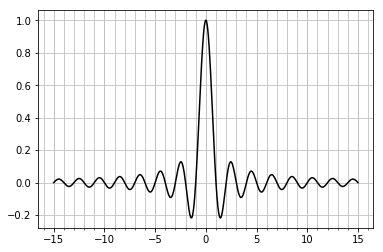

In [45]:
X = np.linspace(-15,15,1024)
Y = np.sinc(X)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.grid(True,which='both',color = '0.75')
plt.plot(X,Y,c='k')
plt.show()

## Controlling tick labeling


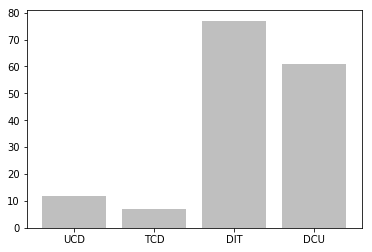

In [47]:
name_list = ('UCD','TCD','DIT','DCU')
value_list = np.random.randint(0,99,size = len(name_list))
pos_list = np.arange(len(name_list))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

plt.bar(pos_list,value_list,color='.75',align = 'center')
plt.show()

# Working with Figures

## Compositing multiple figures

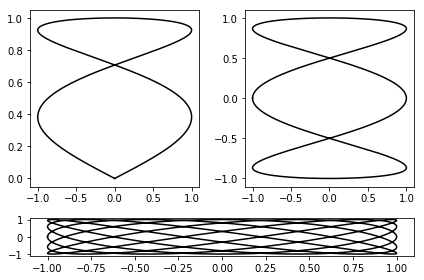

In [61]:
T = np.linspace(-np.pi,np.pi,1024)
grid_size = (4,2)

plt.subplot2grid(grid_size,(0,0),rowspan = 3,colspan = 1)
plt.plot(np.sin(2*T),np.cos(0.5*T),c='k')

plt.subplot2grid(grid_size,(0,1),rowspan = 3,colspan = 1)
plt.plot(np.cos(3*T),np.sin(T),c = 'k')

plt.subplot2grid(grid_size,(3,0),rowspan=1,colspan=2)
plt.plot(np.cos(5* T),np.sin(7*T),c='k')

plt.tight_layout()
plt.show()

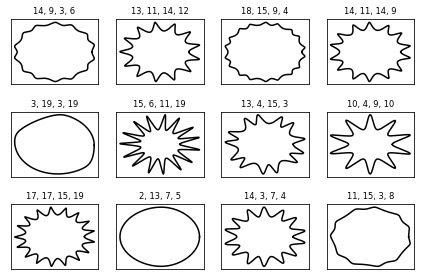

In [70]:
def get_radius(T, params):
    m, n_1, n_2, n_3 = params
    U = (m * T) / 4
    return (np.fabs(np.cos(U)) ** n_2 + np.fabs(np.sin(U)) ** n_3)** (-1. / n_1)

grid_size = (3, 4)
T = np.linspace(0, 2 * np.pi, 1024)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        params = np.random.randint(1, 20, size = 4)
        R = get_radius(T, params)
        axes = plt.subplot2grid(grid_size, (i, j), rowspan=1, colspan=1)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        plt.plot(R * np.cos(T), R * np.sin(T), c = 'k')
        plt.title('%d, %d, %d, %d' % tuple(params), fontsize = 'small')

# plt.suptitle('it is interesting')
plt.tight_layout()
plt.show()

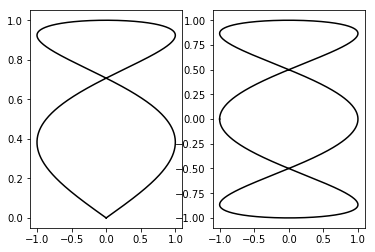

In [72]:
T = np.linspace(-np.pi,np.pi,1024)

fig, (ax0,ax1) = plt.subplots(ncols=2)
ax0.plot(np.sin(2*T),np.cos(0.5*T),c='k')
ax1.plot(np.cos(3*T),np.sin(T),c = 'k')
         
plt.show()

## Scaling both the axes equally

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


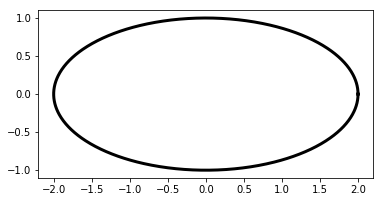

In [75]:
T = np.linspace(0,2*np.pi,1024)

plt.plot(2. * np.cos(T),np.sin(T),c = 'k',lw =3.)
plt.axes().set_aspect('equal')

plt.show()

## Setting an axis range

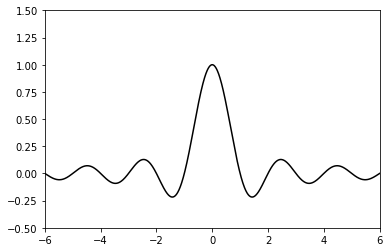

In [78]:
X = np.linspace(-6, 6, 1024)
plt.ylim(-.5, 1.5)
plt.xlim(-6,6)
plt.plot(X, np.sinc(X), c = 'k')
plt.show()

## Setting the aspect ratio

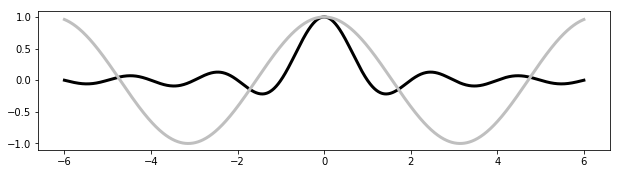

In [81]:
X = np.linspace(-6,6,1024)
Y1,Y2 = np.sinc(X), np.cos(X)

plt.figure(figsize=(10.24, 2.56))
plt.plot(X,Y1,c='k',lw=3.)
plt.plot(X,Y2,c='.75',lw=3.)

plt.show()

## Inserting subfigures

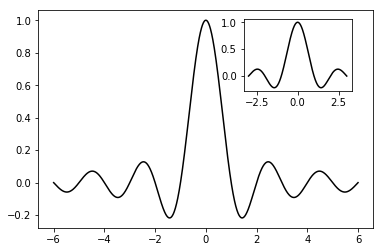

In [85]:
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)
X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

plt.plot(X,Y,c='k')
sub_axes = plt.axes([.6,.6,.25,.25])
sub_axes.plot(X_detail,Y_detail,c='k')
# plt.setp(sub_axes)

plt.show()

## Using a logarithmic scale

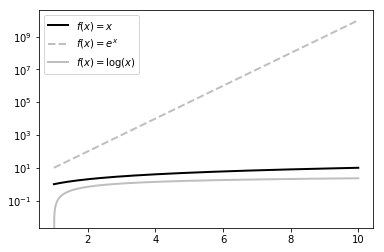

In [86]:
X = np.linspace(1,10,1024)

plt.yscale('log')
plt.plot(X, X, c = 'k', lw = 2., label = r'$f(x)=x$')
plt.plot(X, 10 ** X, c = '.75', ls = '--', lw = 2., label =
r'$f(x)=e^x$')
plt.plot(X, np.log(X), c = '.75', lw = 2., label = r'$f(x)=\log(x)$')

plt.legend()
plt.show()

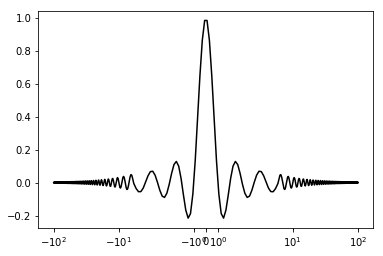

In [88]:
X = np.linspace(-100,100,1024)

plt.xscale('symlog',linthreshx=6)
plt.plot(X,np.sinc(X),c='k')

plt.show()

## Using polar coordinates

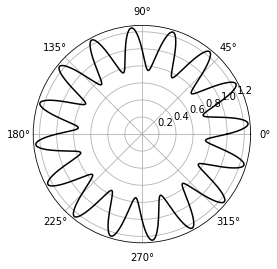

In [89]:
T = np.linspace(0 , 2 * np.pi, 1024)

plt.axes(polar = True)
plt.plot(T, 1. + .25 * np.sin(16 * T), c= 'k')

plt.show()

# Working with a File Output

## Generating a PNG picture file

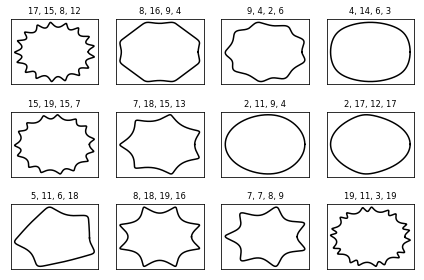

In [92]:
def get_radius(T, params):
    m, n_1, n_2, n_3 = params
    U = (m * T) / 4
    return (np.fabs(np.cos(U)) ** n_2 + np.fabs(np.sin(U)) ** n_3)** (-1. / n_1)

grid_size = (3, 4)
T = np.linspace(0, 2 * np.pi, 1024)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        params = np.random.randint(1, 20, size = 4)
        R = get_radius(T, params)
        axes = plt.subplot2grid(grid_size, (i, j), rowspan=1, colspan=1)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        plt.plot(R * np.cos(T), R * np.sin(T), c = 'k')
        plt.title('%d, %d, %d, %d' % tuple(params), fontsize = 'small')

# plt.suptitle('it is interesting')
plt.tight_layout()
plt.savefig('subtitle.png',c = 'k')

## Handling transparency
- By default, matplotlib will output a figure of 8 x 6 spatial units—a 4/3 aspect ratio.
In matplotlib, 1 spatial unit equals to 100 pixels. Thus, by default, matplotlib will give
a picture file of 800 x 600 pixels. If we use dpi = 300, the picture size will be 8 * 300
x 6 * 300, that is, 2400 x 1800 pixels.

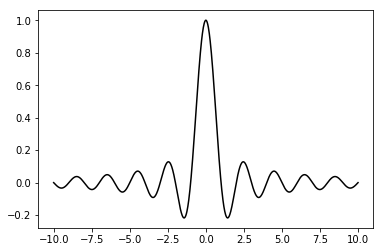

In [94]:
X = np.linspace(-10, 10, 1024)
Y = np.sinc(X)
plt.plot(X, Y, c = 'k')
plt.savefig('sinc.png', dpi = 300)

## Handling multiple-page PDF documents


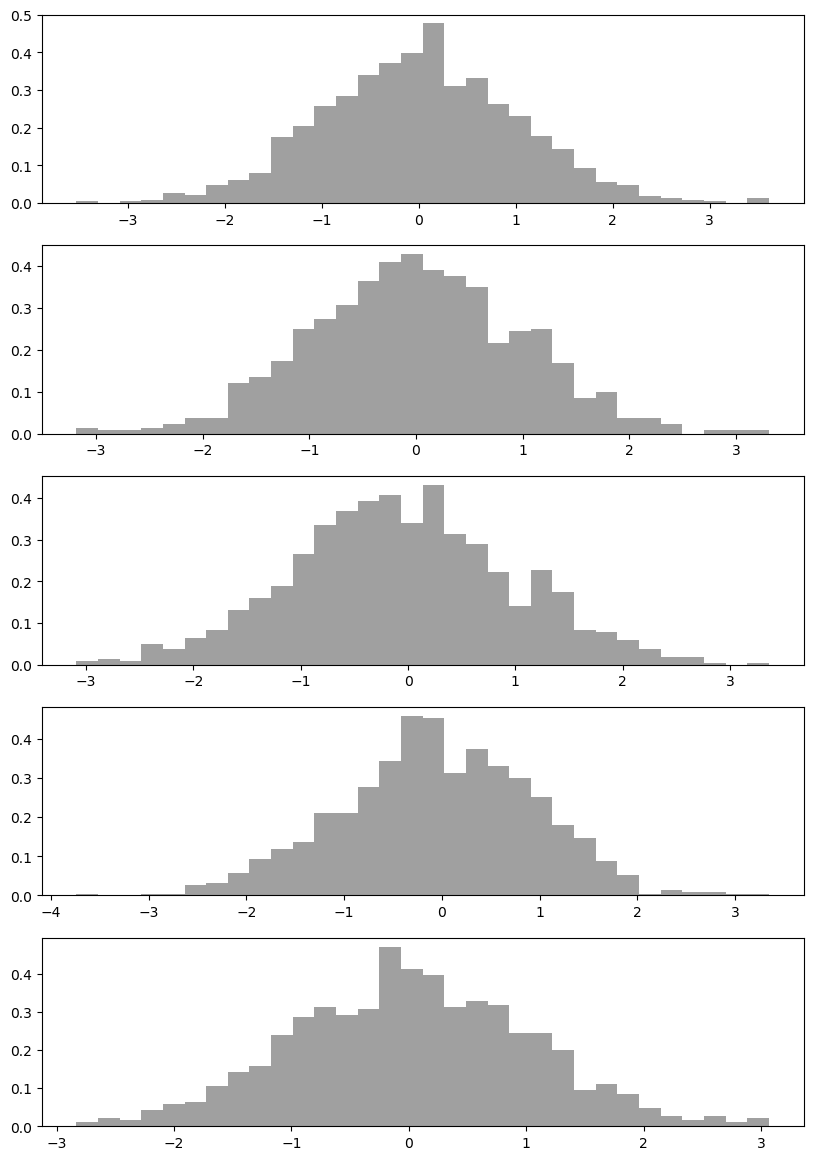

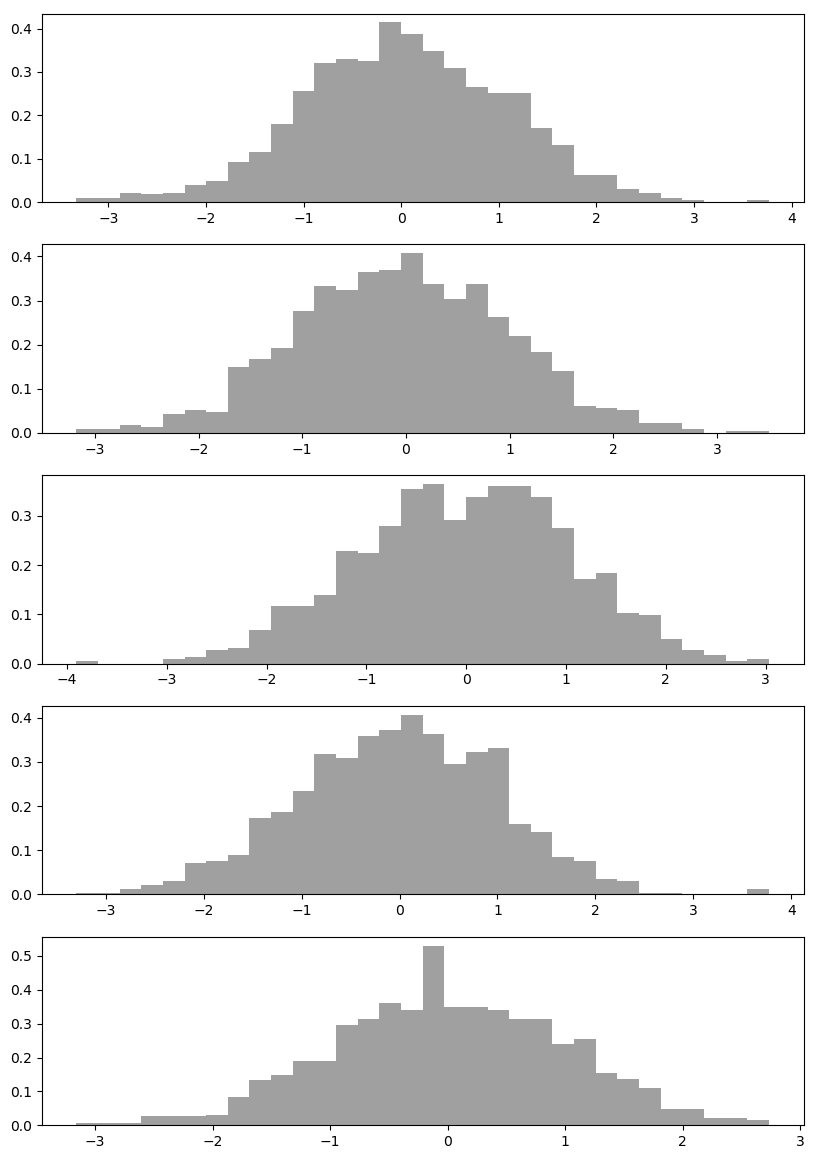

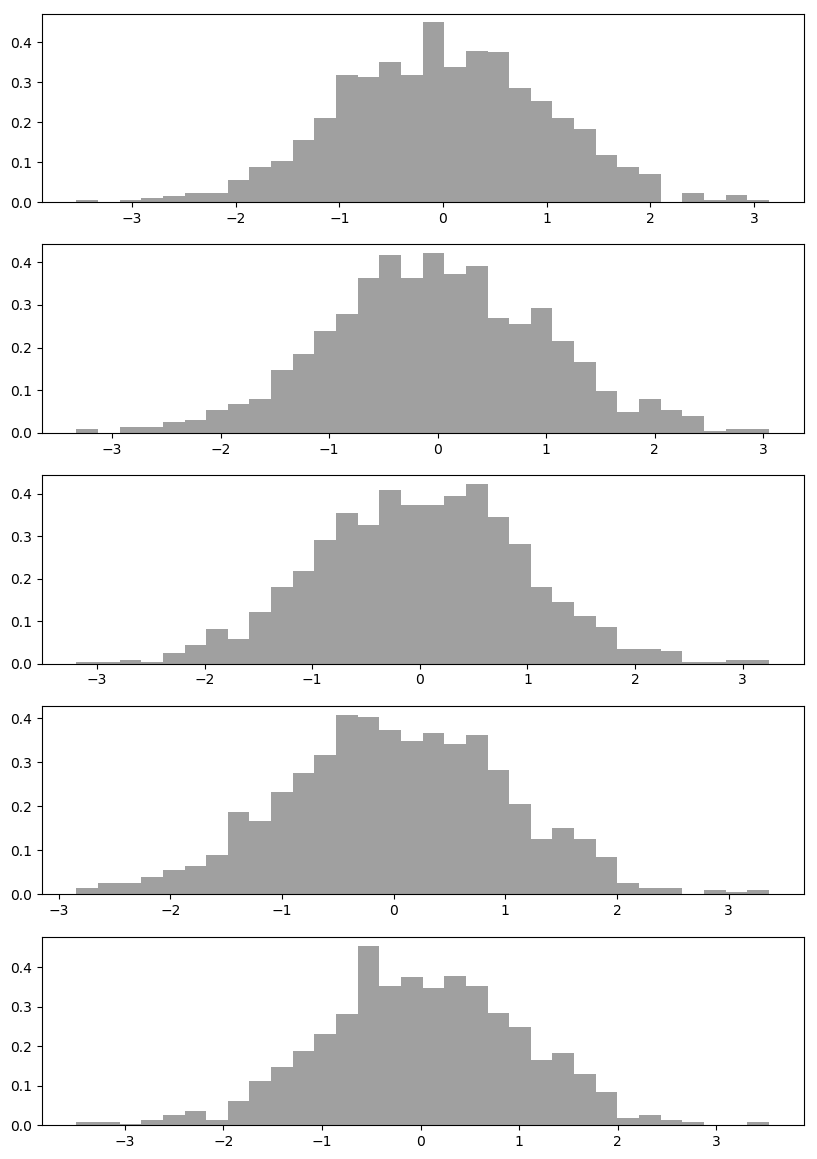

In [97]:
from matplotlib.backends.backend_pdf import PdfPages

# Generate the data
data = np.random.randn(15, 1024)

# The PDF document
pdf_pages = PdfPages('barcharts.pdf')

# Generate the pages
plots_count = data.shape[0]
plots_per_page = 5
pages_count = int(np.ceil(plots_count / float(plots_per_page)))
grid_size = (plots_per_page, 1)
for i, samples in enumerate(data):
    # Create a figure instance (ie. a new page) if needed
    if i % plots_per_page == 0:
        fig = plt.figure(figsize=(8.27, 11.69), dpi=100)

    # Plot one bar chart
    plt.subplot2grid(grid_size, (i % plots_per_page, 0))
    plt.hist(samples, 32, density=1, facecolor='.5', alpha=0.75)
    
    # Close the page if needed
    if (i + 1) % plots_per_page == 0 or (i + 1) == plots_count:
        plt.tight_layout()
        pdf_pages.savefig(fig)

# Write the PDF document to the disk
pdf_pages.close()

# Working with Maps